Theofilus Arkhi Susanto
(theofilus.arkhi@mail.ugm.ac.id)
25/555265/PPA/07030

In [1]:
%pip install numpy opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np, cv2, matplotlib.pyplot as plt

In [40]:
image = cv2.imread("image-assignment-2/image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convolution function

In [41]:
kernel = [
    [0,1,0],
    [1,0,1],
    [0,1,0]
]

def multiplication(kernel, submatrix):
    kernel_size = len(kernel)
    sum = 0
    for i in range(kernel_size):
        for j in range(kernel_size):
            sum += kernel[i][j]*submatrix[i][j]
    return sum

def convolution(kernel, matrix):
    kernel_size = len(kernel)
    padded = np.zeros((len(matrix)+2, len(matrix[0])+2))
    ret = np.zeros_like(padded)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            padded[i+1][j+1] = matrix[i][j]

    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            minplus = kernel_size//2
            start_y = i+1-minplus
            start_x = j+1-minplus
            ret[i+1][j+1] = multiplication(
                kernel, 
                [arr[start_x:start_x+kernel_size] for arr in padded[start_y:start_y+kernel_size]]
                )
    return np.round(ret)
            


In [42]:
matrix=[
    [3,6,2,5,5],
    [2,1,0,2,3],
    [4,1,3,2,1],
    [2,2,1,0,6],
    [3,4,2,0,0]
]

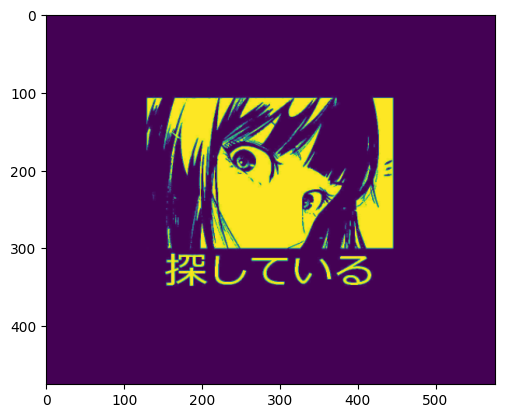

In [43]:
plt.imshow(image)

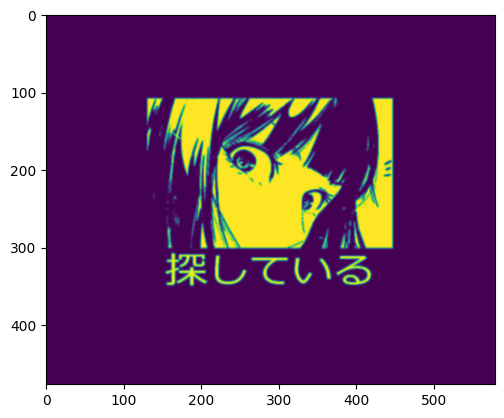

In [44]:
plt.imshow(convolution(kernel, image))

# Spatial Filtering

In [45]:
matrix=[
    [3,6,2,5,5],
    [2,1,0,2,3],
    [4,1,3,2,1],
    [2,2,1,0,6],
    [3,4,2,0,0]
]
kernel_sharpen = [
    [1,1,1],
    [1,-8,1],
    [1,1,1]
]
kernel_smoothing = [
    [0.11,0.11,0.11],
    [0.11,0.11,0.11],
    [0.11,0.11,0.111]
]

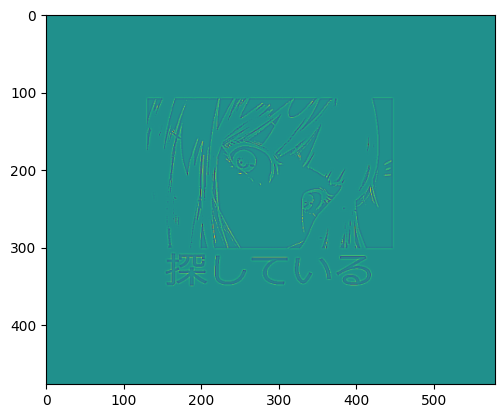

In [46]:
plt.imshow(convolution(kernel_sharpen,image))

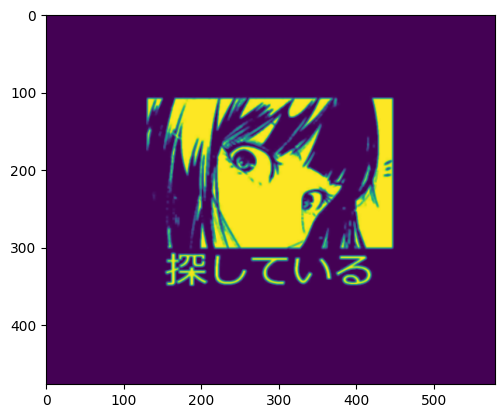

In [47]:
plt.imshow(convolution(kernel_smoothing,image))

"kernel_sharpen" is useful in case of blurred image, while "kernel_smoothing" is useful when there is noise in the image.

# Sharpening with blurring operation

sigma^2 = 0.5

		0.14	0.37	0.14
		0.37	1	0.37
		0.14	0.37	0.14


In [48]:
matrix=[
    [3,6,2,5,5],
    [2,1,0,2,3],
    [4,1,3,2,1],
    [2,2,1,0,6],
    [3,4,2,0,0]
]
kernel_sharpen_blurring = [
    [0.14,  0.37, 0.14],
    [0.37,  1,    0.37],
    [0.14,  0.37, 0.14],
]


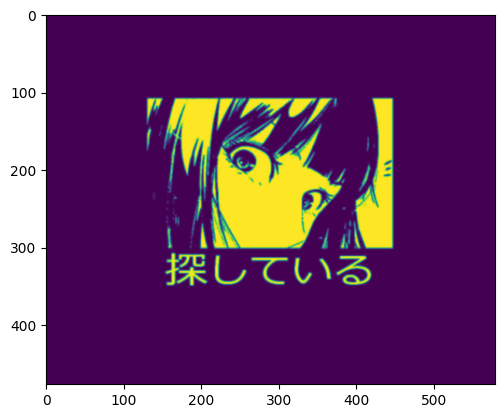

In [50]:
plt.imshow(convolution(kernel_sharpen_blurring,image))

# Discussion

Filtering should be used rather than pixel-based method if the problem with the image is spatial in nature. The examples of spatial problems are blurred image, noise, or the image is too sharp.